In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv(r"data.csv")
data.Date = pd.to_datetime(data.Date)

R - Revenue
<br/>OI - Operation Income

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Gross Profit                    2132 non-null   float64       
 1   Pretax Income                   2132 non-null   float64       
 2   Diluted EPS                     2132 non-null   float64       
 3   EBITDA                          2132 non-null   float64       
 4   ROA                             2132 non-null   float64       
 5   ROE                             2132 non-null   float64       
 6   Total Current Assets            2132 non-null   float64       
 7   Total Long-Term Assets          2132 non-null   float64       
 8   Total Assets                    2132 non-null   float64       
 9   Total Current Liabilities       2132 non-null   float64       
 10  Total Noncurrent Liabilities    2132 non-null   float64       
 11  Tota

In [4]:
data.head()

,Gross Profit,Pretax Income,Diluted EPS,EBITDA,ROA,ROE,Total Current Assets,Total Long-Term Assets,Total Assets,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Date,Company,R,OI
0,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-03-31,AMPY,0.000,0.000
1,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-06-30,AMPY,0.000,0.000
2,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-09-30,AMPY,61.863,-32.289
3,25.009,-33.640,0.000000,-2.230,0.016981,0.032987,48.110,576.545976,624.656000,85.854,253.300,339.154,285.502016,38.239,-79.880,38.765,2011-12-31,AMPY,48.410,2.342
4,13.782,0.659,-0.086831,30.369,0.000000,0.000000,42.309,646.299976,688.609024,147.718,272.896,420.614,267.995008,34.316,-72.466,40.000,2012-03-31,AMPY,49.259,4.064


In [5]:
lst=[]
groups = data.groupby('Company')
for comapny,group in groups:
    group['R change'] = group[['R']] - group[['R']].shift(1).fillna(0)
    group['OI change'] = group[['OI']] - group[['OI']].shift(1).fillna(0)
    group.fillna(0, inplace=True)
    lst.append(group)
data = pd.concat(lst)

In [6]:
train_data = data[data.Date < '2020-06-30']
test_data = data[data.Date >= '2020-06-30']

### **EDA**

Кол-во строк, состоящих из нулей на ... %:
- 10%, 284 шт.
- 20%, 213 шт.
- 30%, 207 шт.
- 40%, 206 шт.
- 80%, 199 шт.
- 100%, 198 шт.

Избавлюсь от строк которые состоят из нулей более чем на 20%. В тестовом наборе данных нулей нет.

In [7]:
train_data = train_data.loc[~((train_data.drop(columns = ['Date', 'Company']) == 0).sum(axis=1) / 18 >= 0.2)]

По некоторым компаниями довольно мало строк, например 6 по MNRL 6, 10 по BRY

In [11]:
train_data.groupby('Company')['R'].count()

Company
AMPY    34
APA     37
AR      34
BATL    37
BCEI    37
BRY      9
BSM     21
CDEV    17
CHK     37
CLR     37
CNX     37
COG     37
COP     37
CPE     37
CRC     22
CRK     37
DEN     37
DVN     37
EGY     37
EOG     37
EQT     37
ESTE    37
FANG    35
GDP     37
HES     37
LONE    17
LPI     35
MCF     37
MGY      9
MNRL     5
MRO     37
MTDR    37
MUR     37
NOG     37
OAS     37
OVV     37
PDCE    37
PVAC    37
PXD     37
REI     29
RRC     37
SBOW    36
SD      37
SM      37
SWN     37
TALO    37
TPL     37
VNOM    22
WLL     37
WTI     37
XEC     37
XOG     16
Name: R, dtype: int64

Агрегации по признакам компаний

In [ ]:
train_data.groupby('Company').agg(['mean', 'std', 'min', 'max']).head()

### **Visualisation**

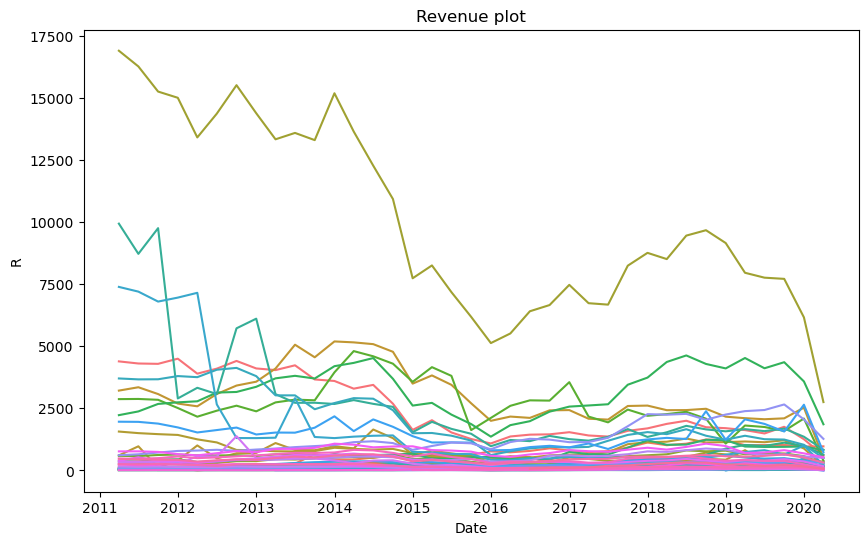

In [12]:
plt.figure(figsize = (10,6))
plt.title("Revenue plot")
sns.lineplot(data=train_data, x="Date", y="R", hue="Company", legend = False)
plt.show()

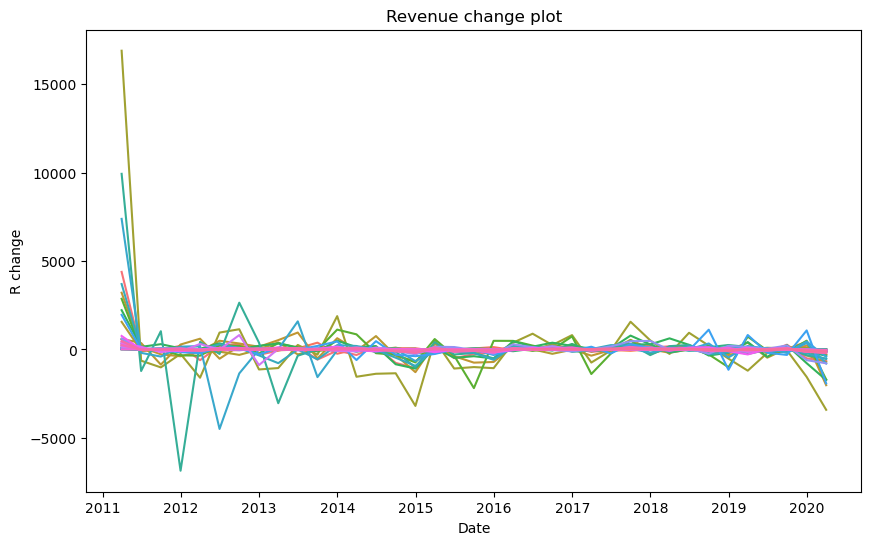

In [13]:
plt.figure(figsize = (10,6))
plt.title("Revenue change plot")
sns.lineplot(data=train_data, x="Date", y="R change", hue="Company", legend = False)
plt.show()

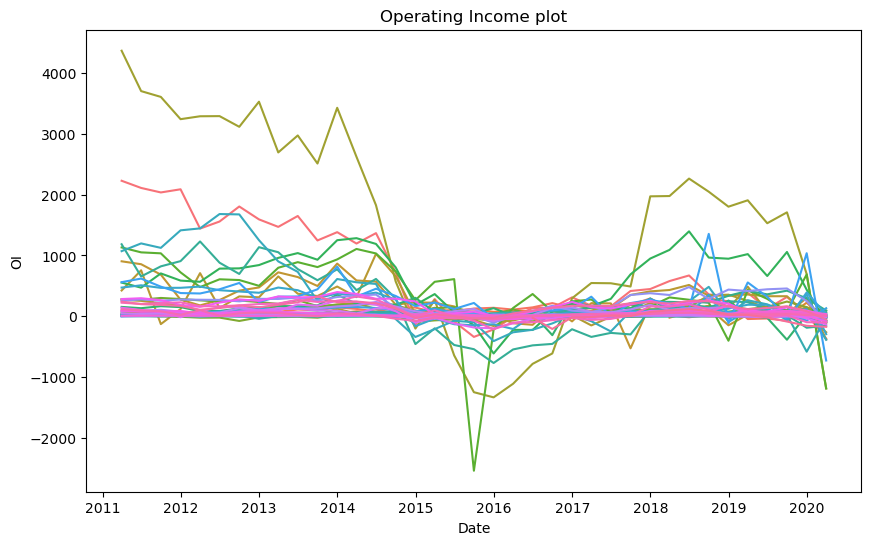

In [14]:
plt.figure(figsize = (10,6))
plt.title("Operating Income plot")
sns.lineplot(data=train_data, x="Date", y="OI", hue="Company", legend = False)
plt.show()

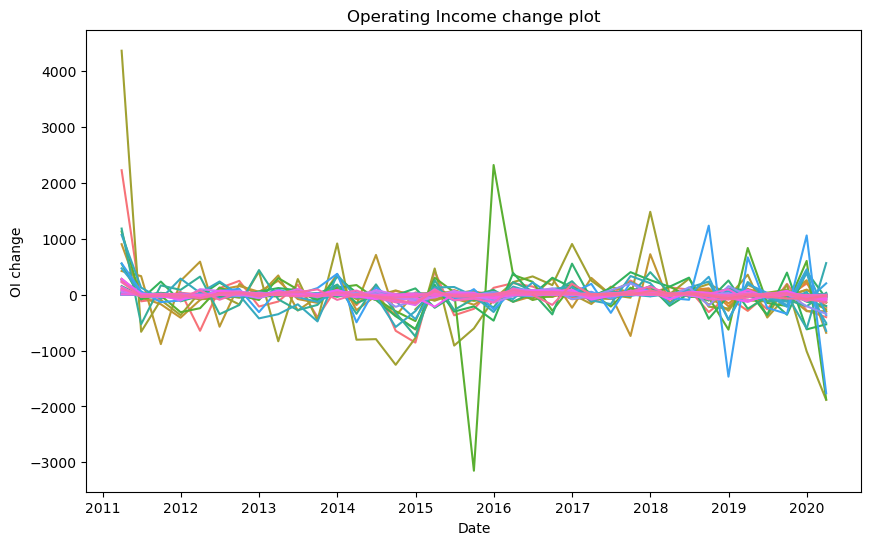

In [16]:
plt.figure(figsize = (10,6))
plt.title("Operating Income change plot")
sns.lineplot(data=train_data, x="Date", y="OI change", hue="Company", legend = False)
plt.show()

Данные сильно скоррелированы, поэтому могут возникнуть проблемы с линейными моделями, однако с этим легко побороться L1 / L2 регуляризацией

In [17]:
corr=train_data.corr()

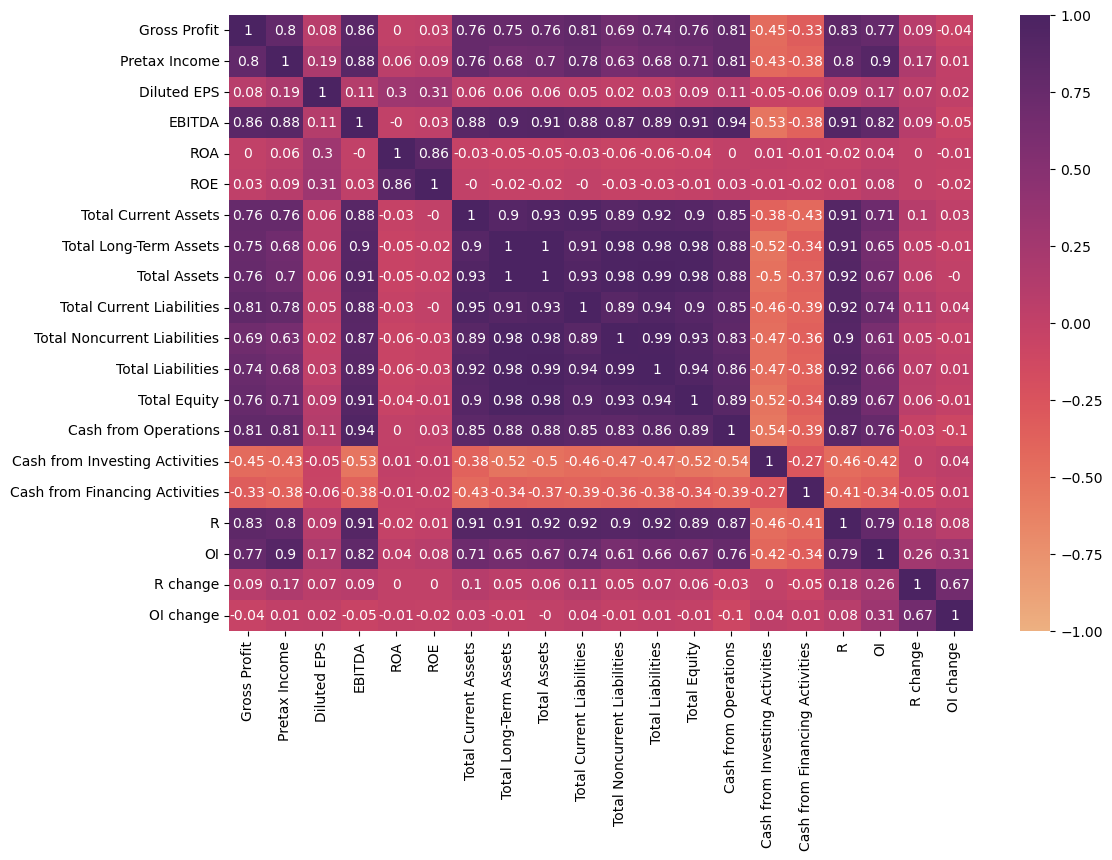

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.around(corr, decimals = 2), vmin=-1, vmax=1, cmap='flare', annot=True)
plt.show()

[]

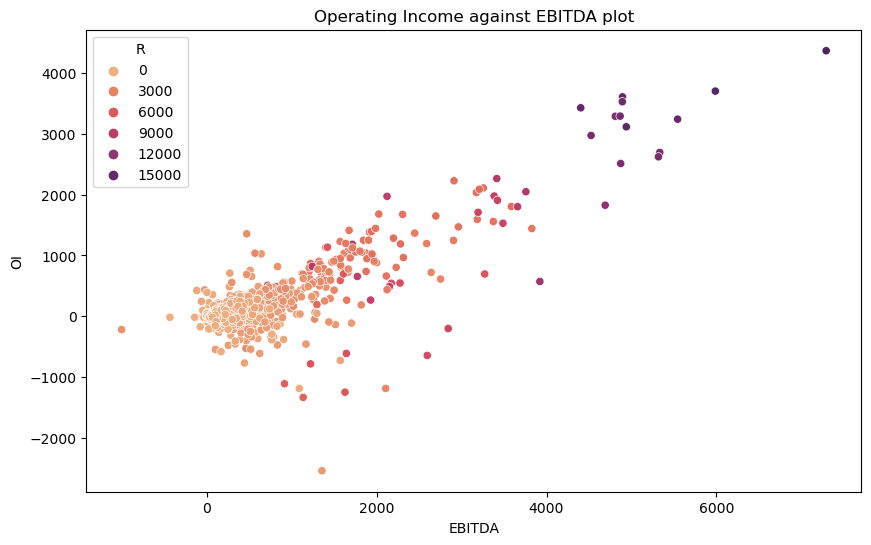

In [19]:
plt.figure(figsize = (10,6))
plt.title("Operating Income against EBITDA plot")
sns.scatterplot(data=train_data, x="EBITDA", y="OI", hue = 'R', palette = 'flare')
plt.plot()

### **Metric**

Если мы хотим выбрать общую метрику качества для нашей задачи, то нам не подойдет MAE, MSE и т.д. От компании к компании они могут сильно варьироваться, так для одной компании MAE=10000 может быть потрясающим результатом, то для другой ужасным. Думаю для данной задачи подойдет метрика качества MAPE, так как она показывает ошибку в процентах, посчитаем MAPE для каждой компании, а затем усредним их и найдем среднюю ошибку в процентах для всех компаний 